In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from taxumap.taxumap_base import Taxumap
from taxumap import input_validation as iv

%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2


# qc-ing olin dataframes

In [19]:
rel_abundances = pd.read_csv(os.path.join('microbiota_table.csv'))
rel_abundances['index_column'] = rel_abundances['index_column'].astype(int)
rel_abundances = rel_abundances.set_index('index_column')
rel_abundances

,Uniq1,Uniq10,Uniq100,Uniq10005,Uniq100070,Uniq100161,Uniq1003,Uniq100332,Uniq100353,Uniq100360,...,Uniq99523,Uniq99645,Uniq99650,Uniq99669,Uniq99681,Uniq99709,Uniq99780,Uniq99833,Uniq99884,Uniq99979
index_column,,,,,,,,,,,,,,,,,,,,,
66600164,0.670946,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600169,0.612890,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600209,0.001633,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66600224,0.006367,0.000000,0.000462,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000024
66600226,0.917854,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66704977,0.000000,0.809957,0.000027,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704978,0.000000,0.929111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
66704990,0.000000,0.000000,0.000094,0.000000,0.0,0.0,0.003682,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000157


In [49]:
tax = pd.read_csv('taxonomy.csv').set_index('OTU')

# tax.columns = ['asdf','asdg22', 'ason92', 'asdofin9111', 'asdoifn2', 'asdgu']
tax

,Kingdom,Phylum,Class,Order,Family,Genus
OTU,,,,,,
Uniq114339,Bacteria,Firmicutes,unknown_Class_of_Firmicutes____Uniq5707,unknown_Order_of_unknown_Class_of_Firmicutes__...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq53046,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Veillonella
Uniq5707,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnospiraceae_FCS020_group
Uniq45364,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
Uniq80019,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia-Shigella
...,...,...,...,...,...,...
Uniq103183,Bacteria,Firmicutes,Bacilli,unknown_Order_of_Bacilli____Uniq45364,unknown_Family_of_unknown_Order_of_Bacilli____...,unknown_Genus_of_unknown_Family_of_unknown_Ord...
Uniq371,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Porphyromonadaceae,Parabacteroides
Uniq75647,Bacteria,Proteobacteria,unknown_Class_of_Proteobacteria____Uniq5707,unknown_Order_of_unknown_Class_of_Proteobacter...,unknown_Family_of_unknown_Order_of_unknown_Cla...,unknown_Genus_of_unknown_Family_of_unknown_Ord...


transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-PF-1', ylabel='taxumap-PF-2'>)

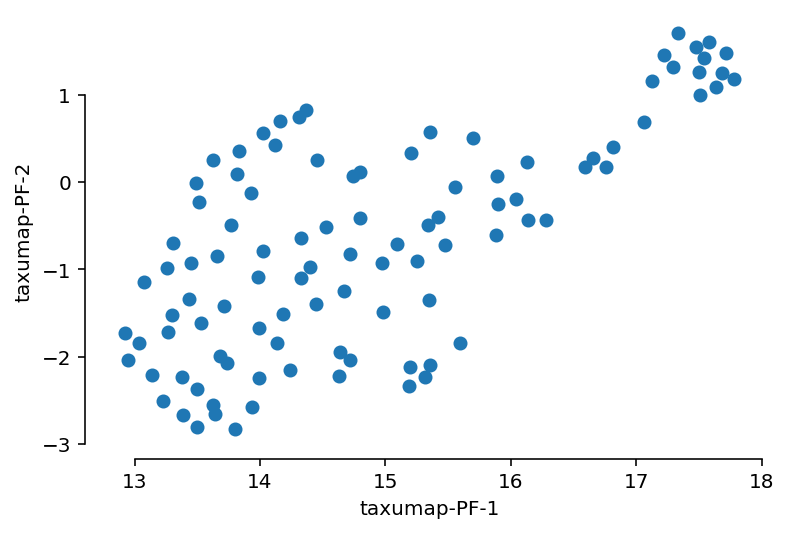

In [50]:
tu = Taxumap(taxonomy=tax, microbiota_data=rel_abundances,)
tu.transform_self()
tu.scatter()

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.

transform_self:WARNING
Please set neigh parameter to approx. the size of individals in the dataset. See documentation.



(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='taxumap-AA-1', ylabel='taxumap-AA-2'>)

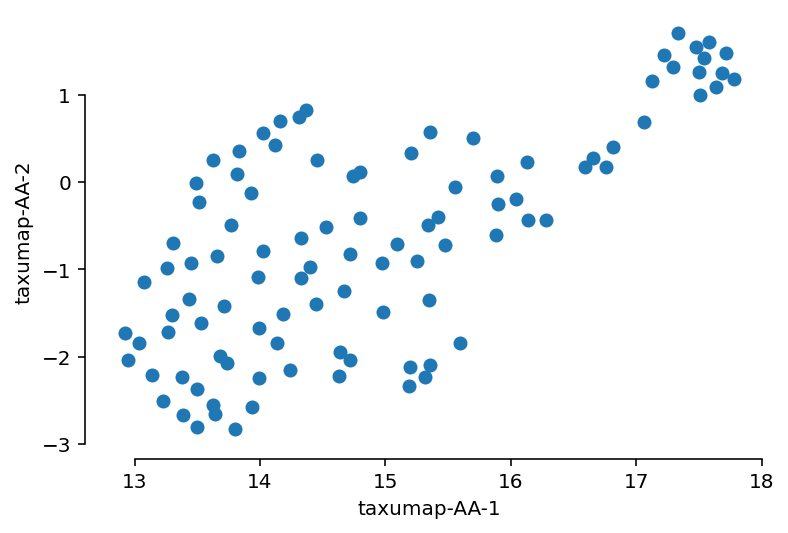

In [46]:
tu = Taxumap(taxonomy=tax, microbiota_data=rel_abundances, agg_levels=['asdg22', 'asdoifn2'])
tu.transform_self()
tu.scatter()

In [31]:
tu.to_pickle(name='test_qc')

Taxumap(agg_levels = ['Phylum', 'Family'], weights = [1, 1])

In [36]:
tu = Taxumap.from_pickle('test_qc')

# creating the clean-the-data dataframes

In [15]:
tax = (
    pd.read_table("example_data/uncleaned_olin_data.tsv")[["#OTU", "Taxonomy"]]
    .rename(columns={"#OTU": "OTU"})
    .set_index("OTU")["Taxonomy"]
    .str.split(";", expand=True)
    .rename(
        columns={
            0: "Kingdom",
            1: "Phylum",
            2: "Class",
            3: "Order",
            4: "Family",
            5: "Genus",
            6: "Species",
        }
    )
    .drop(columns=[7])
).replace(["", "None", None], value=np.nan)


In [17]:
tax.to_csv('uncleaned.csv')

In [43]:
print(iv.fill_tax_table(tax.iloc[[0]]).to_markdown())

| OTU        | Kingdom   | Phylum     | Class                                      | Order                                      | Family                                      | Genus                                      | Species                                      |
|:-----------|:----------|:-----------|:-------------------------------------------|:-------------------------------------------|:--------------------------------------------|:-------------------------------------------|:---------------------------------------------|
| Uniq114339 | Bacteria  | Firmicutes | unk_Class_of_Phylum_Firmicutes__Uniq114339 | unk_Order_of_Phylum_Firmicutes__Uniq114339 | unk_Family_of_Phylum_Firmicutes__Uniq114339 | unk_Genus_of_Phylum_Firmicutes__Uniq114339 | unk_Species_of_Phylum_Firmicutes__Uniq114339 |


| OTU        | Kingdom   | Phylum     | Class                                      | Order                                      | Family                                      | Genus                                      | Species                                      |
|:-----------|:----------|:-----------|:-------------------------------------------|:-------------------------------------------|:--------------------------------------------|:-------------------------------------------|:---------------------------------------------|
| Uniq114339 | Bacteria  | Firmicutes | unk_Class_of_Phylum_Firmicutes__Uniq114339 | unk_Order_of_Phylum_Firmicutes__Uniq114339 | unk_Family_of_Phylum_Firmicutes__Uniq114339 | unk_Genus_of_Phylum_Firmicutes__Uniq114339 | unk_Species_of_Phylum_Firmicutes__Uniq114339 |